In [1]:
#Here we install the nltk package onto the Try Jupyter environment. This needs to be run every time you load in the code.
import sys
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install matplotlib

import string
import nltk #This is a bit redundant, but necessary for the Try Jupyter environment.
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
#Here we load in the file based on the filename.
#If the filename doesn't exist, the program exits.

#Change this line to whatever string you want.
filename = '1997_LETTER.txt'

try:
    file = open(filename)
except:
    print('File cannot be opened: ', filename)

In [3]:
#Here we load in the stopwords from the downloaded nltk stopwords list.
lmtzr = WordNetLemmatizer()
stop = stopwords.words('english')
stop.append("•")
stop.append("amazoncom")
stop.append("1997")

In [4]:
#TODO: FILL IN THE FOLLOWING FUNCTIONS
def sort_and_reverse(lst):
    '''Given some list, we want to first sort it and then reverse it after. Here the order is important!
    The code should be only one or two lines given the following two list functions:
    https://www.w3schools.com/python/ref_list_sort.asp
    https://www.programiz.com/python-programming/methods/list/reverse
   
    NOTE: These functions do not actually return another list, they instead modify the list being passed into our argument.
    So we do not need to return anything for this function'''
    
    #SOLUTION GOES HERE
  

In [5]:
#This function graphs the words we choose onto a bar graph and adjusts the labels.
def graph_words(wordlist, N):
    words=[]
    counts=[]
    for x, word in wordlist[:N]:
        words.append(word)
        counts.append(x)
    fig, ax = plt.subplots()
    ax.bar(words, counts)
    fig.autofmt_xdate()
    plt.show()

In [6]:
#Takes in the file, stopwords list, and number of important words and returns the most frequent words.
def most_frequent_words(file, stop, N):  
    #Here we create a dictionary, which we will assign a value to each word corresponding to the number of times this word appears.
    counts = dict()

    for line in file:
        line = line.rstrip()
        line = line.translate(line.maketrans('', '', string.punctuation))
        line = line.lower()
        words = line.split()

        #Now processes the words list, and removes the stop words.
        for word in words:
            if word not in stop:
                #Lemmatizing- we group similar word inflections together (e.g. rock and rocks becomes the same word)
                word=lmtzr.lemmatize(word)
                if word not in counts:
                    counts[word] = 1
                else:
                    counts[word] += 1

    #Puts the dictionary of counts into a list.
    word_list = [(counts[w], w) for w in counts]
    
    #THIS IS WHERE WE CALL THE FUNCTION YOU WROTE. Sort and reverse the list.
    sort_and_reverse(word_list)
    
    #Prints the table of most frequent words
    print("The " + str(N) + " most frequent words are")
    print("Rank\tCount\tWord")
    i = 1
    for x, word in word_list[:N]:
        print('%2s\t%4s\t%s' %(i, x, word))
        i += 1
    
    #Plot the words.
    graph_words(word_list, N)

The 10 most frequent words are
Rank	Count	Word
 1	   2	logo
 2	   1	letter
 3	   5	shareholder
 4	   1	reprinted
 5	   1	annual
 6	   1	report
 7	   1	passed
 8	   4	many
 9	   1	milestone
10	   3	yearend


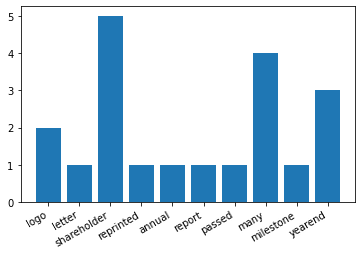

In [7]:
#This fuction currently returns just the top 10 word. 
#You can fix the arguments you pass in to change the number of words this returns.
most_frequent_words(file, stop, 10)